

---



#             **CONSUMER COMPLAINT ANALYSIS**

---









### **IMPORTING THE NECESSARY LIBRARIES AND DEPENDENCIES**

In [ ]:
!pip install klib

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import concurrent.futures

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib # install if not loaded '!pip install klib'
import spacy
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Consumer Complaint Analysis/complaints.csv')

In [ ]:
# First 10 rows of the datset
data.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-03-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"Despite multiple written requests, the unverif...",NaN,"EQUIFAX, INC.",FL,33176,NaN,Consent provided,Web,2023-03-21,Closed with explanation,Yes,NaN,6729806
1,2023-03-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,36117,NaN,Consent not provided,Web,2023-03-21,Closed with explanation,Yes,NaN,6730099
2,2023-03-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,36117,NaN,Consent not provided,Web,2023-03-21,Closed with explanation,Yes,NaN,6730101
3,2023-03-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,11234,NaN,Consent not provided,Web,2023-03-20,Closed with explanation,Yes,NaN,6722170
4,2023-03-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",NY,11234,NaN,Consent not provided,Web,2023-03-20,Closed with explanation,Yes,NaN,6722207
5,2023-03-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,35022,NaN,Consent not provided,Web,2023-03-18,Closed with explanation,Yes,NaN,6714518
6,2023-03-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,35022,NaN,Consent not provided,Web,2023-03-18,Closed with explanation,Yes,NaN,6714565
7,2023-03-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,75501,NaN,Consent not provided,Web,2023-03-17,Closed with explanation,Yes,NaN,6709944
8,2023-03-17,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,75501,NaN,Consent not provided,Web,2023-03-17,Closed with non-monetary relief,Yes,NaN,6710012
9,2023-03-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,75501,NaN,Consent not provided,Web,2023-03-17,Closed with explanation,Yes,NaN,6710013


In [ ]:
data.info() # For checking the information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124953 entries, 0 to 4124952
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 566.

In [ ]:
# FOr checking if dataset contains any null values
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        717387
Consumer complaint narrative    2626969
Company public response         2211603
Company                               0
State                             43235
ZIP code                          30213
Tags                            3696068
Consumer consent provided?       896847
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3356595
Complaint ID                          0
dtype: int64

In [ ]:
# To drop the duplicate rows, dropping missing data, reducing memory usage.
data = klib.data_cleaning(data)

Shape of cleaned data: (4124953, 18) - Remaining NAs: 13814213


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 422.95 MB (-74.66%)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124953 entries, 0 to 4124952
Data columns (total 18 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   date_received                 category
 1   product                       category
 2   sub_product                   category
 3   issue                         category
 4   sub_issue                     category
 5   consumer_complaint_narrative  string  
 6   company_public_response       category
 7   company                       category
 8   state                         category
 9   zip_code                      category
 10  tags                          category
 11  consumer_consent_provided     category
 12  submitted_via                 category
 13  date_sent_to_company          category
 14  company_response_to_consumer  category
 15  timely_response               category
 16  consumer_disputed             category
 17  complaint_id                  int32   
dtypes:

In [ ]:
# to clean the column names like converting it into lowercase
data = klib.clean_column_names(data)

In [ ]:
# Converting the datatypes into appropriate datatypes
data = klib.convert_datatypes(data)

In [ ]:
# Dropping Rows which have missing values in all columns
data = klib.drop_missing(data)

In [ ]:
# Dataframe shape
data.shape

(4124953, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124953 entries, 0 to 4124952
Data columns (total 18 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   date_received                 category
 1   product                       category
 2   sub_product                   category
 3   issue                         category
 4   sub_issue                     category
 5   consumer_complaint_narrative  string  
 6   company_public_response       category
 7   company                       category
 8   state                         category
 9   zip_code                      category
 10  tags                          category
 11  consumer_consent_provided     category
 12  submitted_via                 category
 13  date_sent_to_company          category
 14  company_response_to_consumer  category
 15  timely_response               category
 16  consumer_disputed             category
 17  complaint_id                  int32   
dtypes:

In [ ]:
columns_to_convert = [
    'date_received', 'product', 'sub_product', 'issue', 'sub_issue',
    'company_public_response', 'company', 'state', 'zip_code', 'tags',
    'consumer_consent_provided', 'submitted_via', 'date_sent_to_company',
    'company_response_to_consumer', 'timely_response'
]

# Convert specified columns to object
data[columns_to_convert] = data[columns_to_convert].astype(object)

In [ ]:
# I want to drop all those rows which have null values in my target column
data.dropna(subset = ['consumer_disputed'], inplace=True)

In [ ]:
data.isnull().sum()

date_received                        0
product                              0
sub_product                     235160
issue                                0
sub_issue                       455370
consumer_complaint_narrative    604324
company_public_response         572649
company                              0
state                             5650
zip_code                          3857
tags                            659875
consumer_consent_provided       470521
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed                    0
complaint_id                         0
dtype: int64

In [ ]:
data.shape

(768358, 18)

In [ ]:
data.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
6736,2016-11-29,Credit card,NaN,Unsolicited issuance of credit card,NaN,I went into a jewelry store to look at some XX...,NaN,TD BANK US HOLDING COMPANY,TX,786XX,NaN,Consent provided,Web,2016-11-29,Closed with non-monetary relief,Yes,No,2226745
21902,2016-09-20,Credit reporting,NaN,Incorrect information on credit report,Account status,<NA>,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60623,NaN,NaN,Fax,2016-10-04,Closed with explanation,Yes,No,2120642
21903,2016-09-16,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,<NA>,NaN,HSBC NORTH AMERICA HOLDINGS INC.,IL,60623,NaN,NaN,Fax,2016-10-18,Closed with explanation,Yes,No,2115700
27947,2014-05-26,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,<NA>,NaN,Ocwen Financial Corporation,FL,33175,NaN,NaN,Web,2014-05-26,Closed with explanation,Yes,No,867886
28555,2015-07-14,Mortgage,Other mortgage,Other,NaN,<NA>,NaN,Ocwen Financial Corporation,MI,49015,NaN,NaN,Postal mail,2015-07-20,Closed with explanation,Yes,No,1467999


In [ ]:
data.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       455370
Consumer complaint narrative    604324
Company public response         572649
Company                              0
State                             5650
ZIP code                          3857
Tags                            659875
Consumer consent provided?      470521
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

### **Handelling Missing Values**

As I have huge dataset, and modelling with all the columns is not feasiable, so we can drop few columns which are unnecessary for us.

In [ ]:
data.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [ ]:
clean_df = data.drop(columns=['consumer_consent_provided','complaint_id', 'date_sent_to_company',
                              'zip_code','state','date_received','sub_product','consumer_complaint_narrative',
                              'sub_issue'])
clean_df.dropna(inplace = True)

In [ ]:
clean_df.isnull().sum()

product                         0
issue                           0
company_public_response         0
company                         0
tags                            0
submitted_via                   0
company_response_to_consumer    0
timely_response                 0
consumer_disputed               0
dtype: int64

In [ ]:
clean_df.shape

(29480, 9)

In [ ]:
clean_df = clean_df.reset_index(drop=True)

In [ ]:
clean_df.head(100)

,product,issue,company_public_response,company,tags,submitted_via,company_response_to_consumer,timely_response,consumer_disputed
0,Mortgage,"Loan servicing, payments, escrow account",Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",Older American,Postal mail,Closed with explanation,Yes,No
1,Credit card,Other,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",Servicemember,Phone,Closed with non-monetary relief,Yes,No
2,Debt collection,Cont'd attempts collect debt not owed,Company can't verify or dispute the facts in t...,Focus Holding Company,"Older American, Servicemember",Web,Closed with explanation,Yes,No
3,Credit reporting,Unable to get credit report/credit score,Company chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Servicemember,Phone,Closed with explanation,Yes,No
4,Debt collection,Cont'd attempts collect debt not owed,Company chooses not to provide a public response,"United Collection Bureau, Inc.",Servicemember,Phone,Closed with explanation,Yes,No


ideas ~

1. Either we can delete 'consumer_complaint_narrative' or we have to do a sentiment analysis on this column and classify first this texts into positive, negative and neutral then do the process


Is the target column balanced or not ?

In [ ]:
clean_df['consumer_disputed'].value_counts()

No     24348
Yes     5132
Name: consumer_disputed, dtype: int64

Clearly dataframe is imbalanced. So we can consider the following methods for correcting this issue

- Synthetic Minority Over-sampling Technique (SMOTE)
- Random Over Sampler
- Random Forests or Support Vector Machines
- Stratified Sampling
- Ensemble Methods like Bagging and Boosting
- providing class weights to penalize misclassifications of the minority class more heavily

## Data Cleaning & Pre Processing

---
Checking the product columns for valid product names

In [ ]:
print('Product')
for i in clean_df['product'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('timely_response')
for i in clean_df['timely_response'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('tags')
for i in clean_df['tags'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('company_response_to_consumer')
for i in clean_df['company_response_to_consumer'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('submitted_via')
for i in clean_df['submitted_via'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('consumer_disputed')
for i in clean_df['consumer_disputed'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

print('company_public_response')
for i in clean_df['company_public_response'].unique():
    print(i)

print('```````````````````````````````````````````````````````')

In [ ]:
clean_df['tags'] = clean_df['tags'].replace({'Older American, Servicemember': 'Older American and Servicemember'})

Performing all the NLP preprocessing tasks
- Removing punctuations
- Tokenization
- Lower Casing
- Stop Word Removal
- Lemmatization

In [ ]:
df = pd.DataFrame.copy(clean_df)

In [ ]:
stemmer = PorterStemmer()

def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def parallel_preprocess(column):
    df[column] = df[column].apply(preprocess_text)

columns_to_preprocess = ['product', 'issue', 'company_public_response', 'company', 'tags', 'submitted_via', 'company_response_to_consumer', 'timely_response']
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(parallel_preprocess, columns_to_preprocess)

**Vectorizing the dataset**

Changing the target column into 0 & 1

In [ ]:
df['consumer_disputed'] = df['consumer_disputed'].apply(lambda x: 1 if x == 'Yes' else 0)

**Now we can use WordToVec for embedding the other columns**

In [ ]:
df.head(3)

,product,issue,company_public_response,company,tags,submitted_via,company_response_to_consumer,timely_response,consumer_disputed
0,mortgag,"Loan servicing, payments, escrow account",compani choos provid public respons,bank america nation associ,older american,postal mail,close explan,ye,0
1,credit card,Other,compani choos provid public respons,bank america nation associ,servicememb,phone,close nonmonetari relief,ye,0
2,debt collect,Cont'd attempts collect debt not owed,compani cant verifi disput fact complaint,focu hold compani,older american servicememb,web,close explan,ye,0


In [ ]:
df['combined_text'] = df['product'].astype(str) + ' ' + df['issue'].astype(str) + ' ' + df['company_public_response'].astype(str) + ' ' + df['company'].astype(str) + ' ' + df['tags'].astype(str) + ' ' + df['submitted_via'].astype(str) + ' ' + df['company_response_to_consumer'].astype(str) + ' ' + df['timely_response'].astype(str)

from nltk.tokenize import word_tokenize
df['tokenized_text'] = df['combined_text'].apply(word_tokenize)

In [ ]:
w2v_model = Word2Vec(sentences = df['tokenized_text'], vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
word_embeddings = [w2v_model.wv[word] for word in df['tokenized_text']]

In [ ]:
from gensim.models import Word2Vec

w2v_model.save("word2vec_model.bin")

In [ ]:
document_embeddings = [np.mean(embeddings, axis=0) if embeddings.any() else np.zeros(w2v_model.vector_size) for embeddings in word_embeddings]

In [ ]:
df['document_embeddings'] = document_embeddings

In [ ]:
df.head(2)

,product,issue,company_public_response,company,tags,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,combined_text,tokenized_text,document_embeddings
0,mortgag,"Loan servicing, payments, escrow account",compani choos provid public respons,bank america nation associ,older american,postal mail,close explan,ye,0,"mortgag Loan servicing, payments, escrow accou...","[mortgag, Loan, servicing, ,, payments, ,, esc...","[-0.99321014, -0.63861626, 0.49371362, 0.64878..."
1,credit card,Other,compani choos provid public respons,bank america nation associ,servicememb,phone,close nonmonetari relief,ye,0,credit card Other compani choos provid public ...,"[credit, card, Other, compani, choos, provid, ...","[-1.0997821, -0.419654, 0.16599005, -0.1696678..."


In [ ]:
len(df['document_embeddings'][0])

100

# **Modelling**

In [ ]:
l = [len(i) for i in df['document_embeddings']]
print(sorted(l)[int(len(l)/2)])
print(len(df['document_embeddings'][0]))
print(len(df['document_embeddings']))

100
100
29480


Total length 29480, each row length 100

In [ ]:
X = df['document_embeddings']
y = df['consumer_disputed']
X = np.array(X)
y = np.array(y)

**RandomOverSampler is a technique used in machine learning to handle imbalanced datasets. It works by randomly duplicating instances of the minority class in the dataset until it is balanced with the majority class.**

In [ ]:
X.shape,y.shape

((29480,), (29480,))

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.reshape(-1, 1), y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())
X_train.shape, X_test.shape

((38956, 1, 100), (9740, 1, 100))

In [ ]:
train_class_distribution = np.bincount(y_train)
test_class_distribution = np.bincount(y_test)

print(f"Train Class Distribution: {train_class_distribution}")
print(f"Test Class Distribution: {test_class_distribution}")

Train Class Distribution: [19569 19387]
Test Class Distribution: [4779 4961]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

In [ ]:
early_stopping = EarlyStopping(monitor = 'accuracy' , patience = 1  ,restore_best_weights = True )
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model_hist= model.fit(X_train, y_train, epochs=10, batch_size=32,
                      validation_data=(X_test, y_test),verbose=1,callbacks=[early_stopping])

Epoch 1/10
1218/1218 [==============================] - 385s 310ms/step - loss: 0.6909 - accuracy: 0.5276 - val_loss: 0.6898 - val_accuracy: 0.5492
Epoch 2/10
1218/1218 [==============================] - 375s 308ms/step - loss: 0.6893 - accuracy: 0.5389 - val_loss: 0.6867 - val_accuracy: 0.5520
Epoch 3/10
1218/1218 [==============================] - 380s 312ms/step - loss: 0.6884 - accuracy: 0.5408 - val_loss: 0.6883 - val_accuracy: 0.5430
Epoch 4/10
1218/1218 [==============================] - 377s 310ms/step - loss: 0.6894 - accuracy: 0.5326 - val_loss: 0.6937 - val_accuracy: 0.4907


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.2).astype('int32')
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

305/305 [==============================] - 29s 92ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4779
           1       0.00      0.00      0.00      4961

    accuracy                           0.49      9740
   macro avg       0.25      0.50      0.33      9740
weighted avg       0.24      0.49      0.32      9740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.75).astype('int32')
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

305/305 [==============================] - 37s 120ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4779
           1       0.00      0.00      0.00      4961

    accuracy                           0.49      9740
   macro avg       0.25      0.50      0.33      9740
weighted avg       0.24      0.49      0.32      9740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


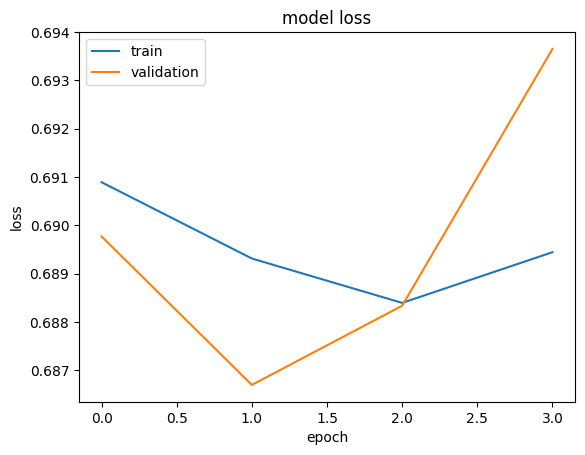

In [ ]:
plt.plot(Model_hist.history['loss'])
plt.plot(Model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

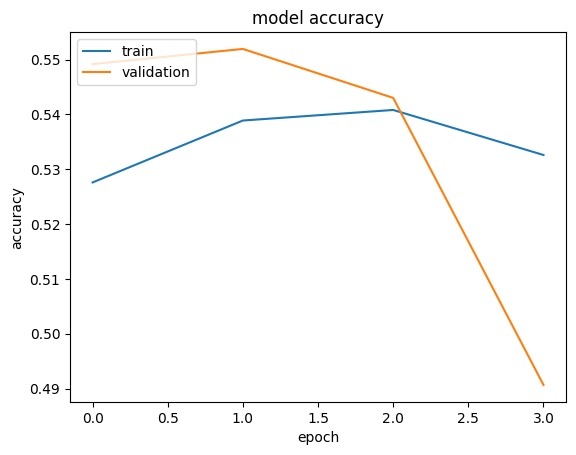

In [ ]:
plt.plot(Model_hist.history['accuracy'])
plt.plot(Model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('TRAINED_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('TRAINED_lstm_model.h5')

Further Prediction

In [ ]:
w2v_model = Word2Vec.load("word2vec_model.bin")

In [ ]:
example_text = "mortgag Loan servicing, payments, escrow account compani choos provid public respons bank america nation associ older american postal mail close explan ye"


tokenized_text = word_tokenize(example_text.lower())  # Convert to lowercase for consistency

word_embeddings_2 = [w2v_model.wv[word] for word in tokenized_text if word in w2v_model.wv]


In [ ]:
document_embeddings_2 = [np.mean(embeddings, axis=0) if embeddings.any() else np.zeros(w2v_model.vector_size) for embeddings in word_embeddings_2]

In [ ]:
import numpy as np

# Assuming 'example_text' is the text you want to convert
example_tokens = word_tokenize(example_text)

# Initialize an empty list to store word vectors
example_vectors = []

# Iterate through each token in the example text
for token in example_tokens:
    try:
        vector = w2v_model.wv[token]
        example_vectors.append(vector)
    except KeyError:
        # Handle the case where a token is not in the vocabulary
        pass

# If there are no vectors for any tokens, add a zero vector
if not example_vectors:
    example_vectors.append(np.zeros(w2v_model.vector_size))

# Calculate the mean of the word vectors
example_vector = np.mean(example_vectors, axis=0)

# 'example_vector' now contains the vector representation of the example text



In [ ]:
vec = np.array(example_vector)

final_vec= np.expand_dims(vec, axis=-1)

In [ ]:
final_vec.shape

(100, 1)

In [ ]:
final_vec = vec.reshape((1, vec.shape[0],1))

In [ ]:
pred = model.predict(final_vec)

1/1 [==============================] - 0s 99ms/step


In [ ]:
pred

array([[0.5186942]], dtype=float32)

In [ ]:
pred_class = 'Yes'
if pred[0][0]<0.5:
    pred_class = 'Yes'
else:
    pred_class = 'No'

pred_class

'No'